In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
import matplotlib.pyplot as plt


In [ ]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock, start=start, end=end)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

Price,Date,Close
Ticker,,GOOG
0,2012-01-03 00:00:00+00:00,16.573130
1,2012-01-04 00:00:00+00:00,16.644611
2,2012-01-05 00:00:00+00:00,16.413727
3,2012-01-06 00:00:00+00:00,16.189817
4,2012-01-09 00:00:00+00:00,15.503389
...,...,...
2756,2022-12-14 00:00:00+00:00,95.309998
2757,2022-12-15 00:00:00+00:00,91.199997
2758,2022-12-16 00:00:00+00:00,90.860001


In [ ]:
data = data[['Close']]  # Use 'Close' prices for prediction
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for RNN


In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    SimpleRNN(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0188 - val_loss: 0.0150
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0019 - val_loss: 0.0128
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0014 - val_loss: 0.0053
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0012 - val_loss: 0.0076
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 8.7250e-04 - val_loss: 0.0089
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 8.7917e-04 - val_loss: 0.0101
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 8.4426e-04 - val_loss: 0.0115
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 7.0585e-04 - val_loss: 0.0096
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 7.2535e-04 - val_loss: 0.0042
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 7.7396e-04 - val_loss: 0.0078
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 6.6928e-04 - val_loss: 0.0063
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")


Train Loss: 7.799016020726413e-05, Test Loss: 0.0004650794726330787


In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


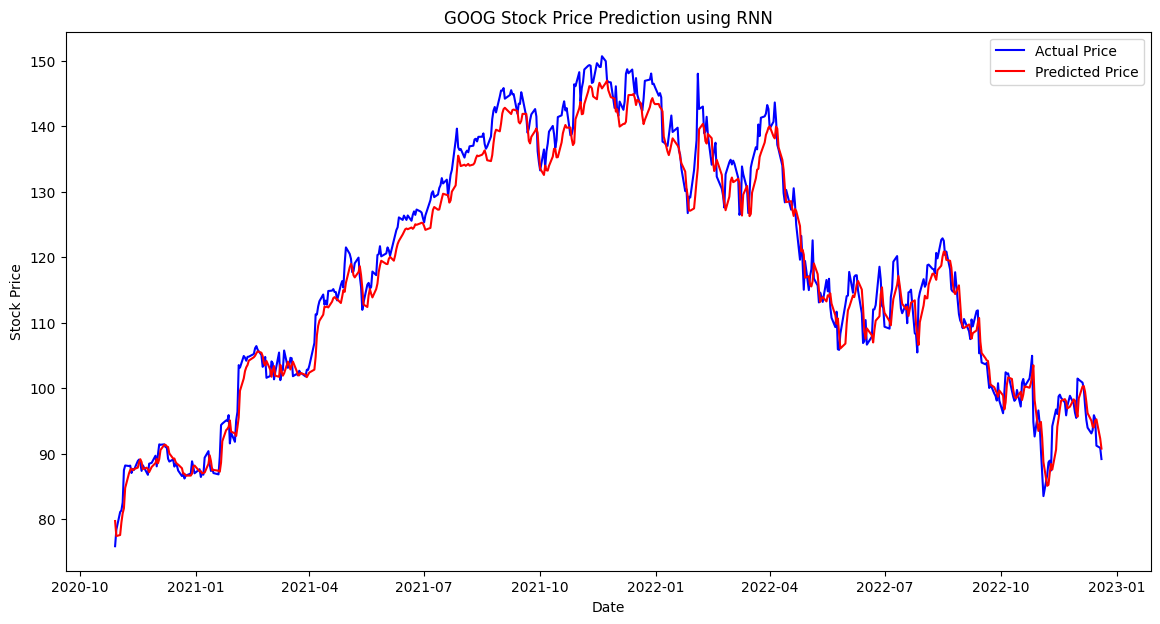

In [ ]:
# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, color='blue', label='Actual Price')
plt.plot(data.index[-len(y_test):], y_pred, color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f"{stock} Stock Price Prediction using RNN")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0146 - val_loss: 7.0256e-04
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0014 - val_loss: 0.0076
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0011 - val_loss: 0.0064
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.9013e-04 - val_loss: 0.0056
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.7358e-04 - val_loss: 0.0034
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 6.6266e-04 - val_loss: 9.7615e-04
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 6.3611e-04 - val_loss: 0.0025
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 6.3523e-04 - val_loss: 0.0030
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


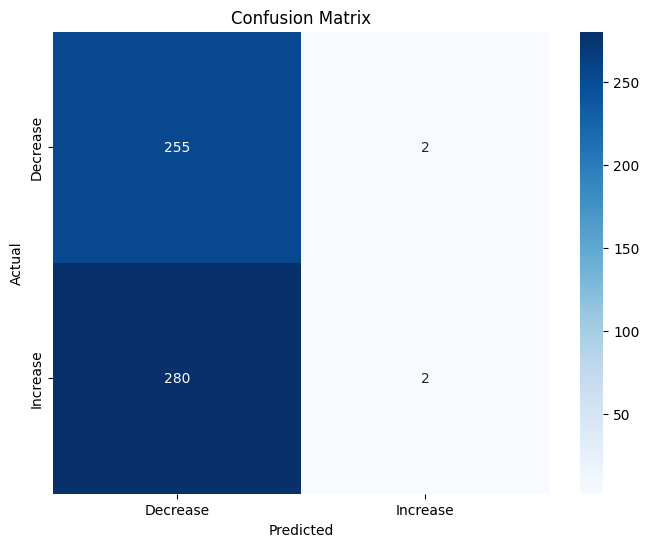

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.99      0.64       257
           1       0.50      0.01      0.01       282

    accuracy                           0.48       539
   macro avg       0.49      0.50      0.33       539
weighted avg       0.49      0.48      0.31       539



In [ ]:


import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Download stock data
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock, start=start, end=end)

# Prepare the data
data = data[['Close']]  # Use 'Close' prices for prediction
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create a dataset for RNN
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for RNN

# Split into training and testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    SimpleRNN(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predictions
y_pred = model.predict(X_test)

# Inverse scale the predictions and test data
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Convert to binary classes: 1 (Price Increase), 0 (Price Decrease)
y_test_class = (y_test_rescaled[1:] > y_test_rescaled[:-1]).astype(int).flatten()
y_pred_class = (y_pred_rescaled[1:] > y_test_rescaled[:-1]).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Decrease", "Increase"], yticklabels=["Decrease", "Increase"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))


[*********************100%***********************]  1 of 1 completed


AUC: 0.4581679894179894


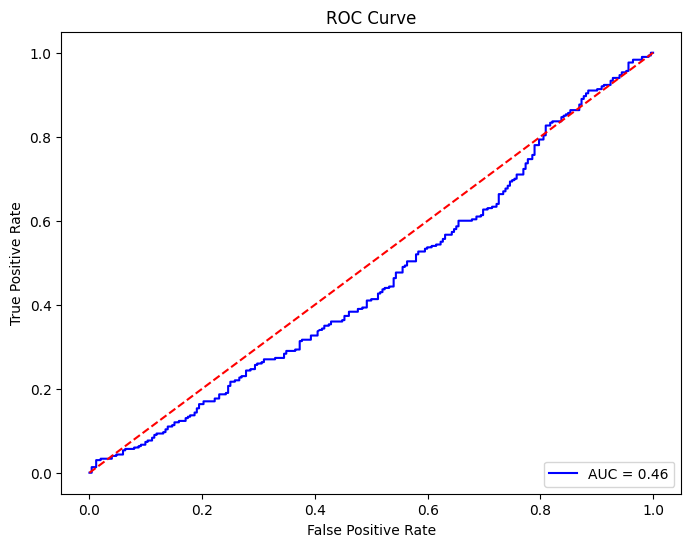

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Download stock data
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock, start=start, end=end)
data = data[['Close']]

# Create binary classification labels (1: Increase, 0: Decrease)
data['Movement'] = (data['Close'].shift(-1) > data['Close']).astype(int)  # Shift to compare with next day's price
data = data.dropna()

# Feature preparation (using Close prices scaled as input for simplicity)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Scaled_Close'] = scaler.fit_transform(data[['Close']])
X = data[['Scaled_Close']].values[:-1]  # All but the last row (no future data for the last day)
y = data['Movement'].values[:-1]

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (increase)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Download stock data
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock, start=start, end=end)

# Prepare the data
data = data[['Close']]  # Use 'Close' prices for prediction
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create a dataset for RNN
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for RNN input

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    SimpleRNN(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test).flatten()

# Convert predictions and actual values to binary classes: Up (1) or Down (0)
# If the price increases compared to the previous time step, classify as 1; otherwise, 0
y_test_class = (y_test[1:] > y_test[:-1]).astype(int)  # Actual: price increased (1) or decreased (0)
y_pred_class = (y_pred[1:] > y_test[:-1]).astype(int)  # Predicted: price increased (1) or decreased (0)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy * 100:.2f}%")


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0142 - val_loss: 0.0011
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0018 - val_loss: 7.7896e-04
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 9.8490e-04 - val_loss: 0.0028
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 8.7238e-04 - val_loss: 8.9524e-04
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.0192e-04 - val_loss: 0.0017
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 7.2705e-04 - val_loss: 0.0027
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.5356e-04 - val_loss: 0.0019
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 6.4793e-04 - val_loss: 0.0023
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Accuracy: 48.05%
